### MNIST Softmax

In [1]:
# mnist_softmax_deep_relu
# 4 layers

# MNIST(Modified National Institute of Standard Technology) Dataset
# label : 0 ~ 9 , 손글씨체 이미지  28*28(784 byte) , gray scale
# batch : 큰 데이터를 쪼개어 1회에 작은 단위로 가져다가 학습, next_batch()
# epoch : batch를 반복하여 전체 데이터가 모두 소진되었을 때를 1 epoch
# Vanishing Gradient  : 신경망이 깊어 질수록 입력신호가 사라진다(줄어든다), sigmoid 사용시
# Relu  : Rectified Linear Unit, DNN(deep neural net) 구현시 sigmoid 대신 사용됨
# dropout : 전체 신경망의 일부를 사용하지 않고 학습, 예측시는 전체를 사용

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.random.set_seed(5)

In [3]:
# mnist 데이터 가져오기
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


label: 5


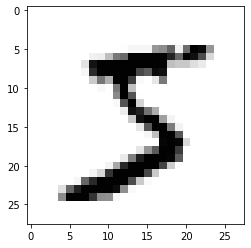

In [4]:
# 이미지로 출력
def show_one_image(n):
    image = x_train[n]
    print('label:', y_train[n])
    
    plt.imshow(image, cmap='Greys')
    plt.show()
    
show_one_image(0)    

In [5]:
# one_hot 인코딩
nb_classes = 10   # 분류 class의 갯수(0~9)

Y_one_hot = tf.one_hot(y_train, nb_classes)  # (60000, 10)
print(Y_one_hot.shape)

(60000, 10)


In [6]:
# X값의 shape을 2차원으로 변환
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

# X값의 타입을 float형으로 변환
x_train = tf.cast(x_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)

print(x_train.shape, x_train.dtype)
print(x_test.shape, x_test.dtype)

(60000, 784) <dtype: 'float32'>
(10000, 784) <dtype: 'float32'>


In [7]:
# Layer 1  : 은닉층
# (60000, 784) * (784,512) = (60000,512)
W1 = tf.Variable(tf.random.normal([784,512]), name='weight1')
b1 = tf.Variable(tf.random.normal([512]), name='bias1')

def layer1(X):
    return tf.nn.relu(tf.matmul(X,W1) + b1)

In [8]:
# Layer 2  : 은닉층
# (60000, 512) * (512,512) = (60000,512)
W2 = tf.Variable(tf.random.normal([512,512]), name='weight2')
b2 = tf.Variable(tf.random.normal([512]), name='bias2')

def layer2(X):
    return tf.nn.relu(tf.matmul(layer1(X),W2) + b2)

In [9]:
# Layer 3  : 은닉층
# (60000, 512) * (512,512) = (60000,512)
W3 = tf.Variable(tf.random.normal([512,512]), name='weight3')
b3 = tf.Variable(tf.random.normal([512]), name='bias3')

def layer3(X):
    return tf.nn.relu(tf.matmul(layer2(X),W3) + b3)

In [10]:
# Layer 4  : 출력층
# (60000, 512) * (512,10) = (60000,10)
W4 = tf.Variable(tf.random.normal([512,10]), name='weight4')
b4 = tf.Variable(tf.random.normal([10]), name='bias4')

In [11]:
# 예측 함수(hypothesis) : H(X) = softmax(W*X + b)
def logits(X):
    return tf.matmul(layer3(X),W4) + b4

def hypothesis(X):
    return tf.nn.softmax(logits(X)) 

In [12]:
# 비용함수 구현 방법 : tf.nn.softmax_cross_entropy_with_logits() 함수 사용
# def cost_func():
#     cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits(x_train),
#                                              labels = Y_one_hot)
#     cost =  tf.reduce_mean(cost_i)
#     return cost

In [13]:
# optimizer : 경사하강법
# optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [14]:
# 학습 시작

training_epoch = 25
batch_size = 600

# 경사 하강법
# learning_rate(학습율)을 0.01 로 설정하여 optimizer객체를 생성
optimizer = tf.keras.optimizers.Adam(lr=0.01)

Y_one_hot = tf.one_hot(y_train,nb_classes)   # (60000, 10)

print('***** Start Learning!!')
for epoch in range(training_epoch): # 25회
    
    avg_cost = 0
    
    # 100 = 60000/600
    total_batch = int(x_train.shape[0]/batch_size)
    for k in range(total_batch):  # 100회
        batch_xs = x_train[0 + k*batch_size:batch_size + k*batch_size]   # 600개의 X 데이터
        batch_ys = Y_one_hot[0 + k*batch_size:batch_size + k*batch_size] # 600개의 Y 데이터
        
        # 비용함수        
        def cost_func_batch():
            cost_i = tf.nn.softmax_cross_entropy_with_logits(logits = logits(batch_xs),
                                             labels = batch_ys)
            cost =  tf.reduce_mean(cost_i)
            return cost
        
        # cost를 minimize 한다
        optimizer.minimize(cost_func_batch,var_list=[W1,b1,W2,b2,W3,b3,W4,b4])
        avg_cost += cost_func_batch().numpy()/total_batch
            
    print('Epoch:','%04d'%(epoch + 1),'cost:','{:.9f}'.format(avg_cost))
             
print('***** Learning Finished!!')

***** Start Learning!!
Epoch: 0001 cost: 915109.189570313
Epoch: 0002 cost: 83774.786132812
Epoch: 0003 cost: 36611.189130859
Epoch: 0004 cost: 17804.677089844
Epoch: 0005 cost: 8753.346178284
Epoch: 0006 cost: 4863.078520966
Epoch: 0007 cost: 3709.807823486
Epoch: 0008 cost: 2892.178078918
Epoch: 0009 cost: 1632.920475960
Epoch: 0010 cost: 1020.085501206
Epoch: 0011 cost: 641.581421528
Epoch: 0012 cost: 646.981990116
Epoch: 0013 cost: 561.247804985
Epoch: 0014 cost: 279.327492771
Epoch: 0015 cost: 480.619680510
Epoch: 0016 cost: 512.202413292
Epoch: 0017 cost: 562.212880779
Epoch: 0018 cost: 440.208505764
Epoch: 0019 cost: 513.498223484
Epoch: 0020 cost: 516.984017897
Epoch: 0021 cost: 721.560082623
Epoch: 0022 cost: 1022.667242377
Epoch: 0023 cost: 992.092312489
Epoch: 0024 cost: 775.147296581
Epoch: 0025 cost: 522.981955767
***** Learning Finished!!


In [15]:
# 정확도 측정 : accuracy computation

# y_test 값의 one-hot 인코딩
Y_one_hot = tf.one_hot(y_test,nb_classes)    # (10000,10)
print(Y_one_hot.shape)                       # (10000,10)  , (2차원)

# tf.argmax() : 값이 가장 큰 요소의 인덱스 값을 반환
def predict(X):
    return tf.argmax(hypothesis(X),axis=1)

correct_predict = tf.equal(predict(x_test),tf.argmax(Y_one_hot,1))
accuracy = tf.reduce_mean(tf.cast(correct_predict, dtype = tf.float32))
print("Accuracy:",accuracy.numpy()) # Accuracy: 0.8879

#예측
print('***** Predict')
pred = predict(x_test).numpy()
print(pred,y_test)

(10000, 10)
Accuracy: 0.9636
***** Predict
[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6]


random =  9389 Label: 2
Prediction :  [2]


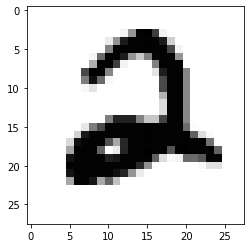

In [16]:
# 임의의 test 데이터로 예측한 값 시각화하기
r = np.random.randint(0,x_test.shape[0] - 1) # 0 to 9999 random int number
# r = 1411   # Label: 0, Prediction :  [9]

print('random = ',r, 'Label:',y_test[r])

print('Prediction : ',predict(x_test[r:r+1]).numpy())

image = tf.reshape(x_test[r],(28,28))
plt.imshow(image,cmap='Greys')
plt.show()

In [ ]:
# 정확도 비교
# 1 layers              -------> Accuracy  : 0.8871
# 4 layers  sigmoid     -------> Accuracy  : 0.9017
# 4 layers  relu        -------> Accuracy  : 0.9636